# This script cleans up the data from PNAS - urban sprawl paper
https://gitlab.com/cpbl/global-sprawl-2020

In [23]:
import pandas as pd
import os
import numpy as np
RAW_FOLDER = "/Users/yuan/Dropbox (Personal)/Personal Work/_Projects2023/01_city-never-was/_data/_raw/r_road_sprawl_index"
CURATE_FOLDER_ROAD = "/Users/yuan/Dropbox (Personal)/Personal Work/_Projects2023/01_city-never-was/_data/_curated/c_hex_road"
print(os.listdir(CURATE_FOLDER_ROAD))

RAW_FILE = "pnas-urban-sprawl_city.xlsx"
ROOT = "/Users/yuan/Dropbox (Personal)/Personal Work/_Projects2023"
# ROOT = "D:/Dropbox (Personal)/Personal Work/_Projects2023"
CURATED_FOLDER = f"{ROOT}/01_city-never-was/_data/_curated/"
EXPORT_FOLDER = f"{ROOT}/01_city-never-was/_data/_curated/c_analysis"




['res=8', 'res=9']


In [11]:
city_df_basics = pd.read_csv(os.path.join(EXPORT_FOLDER, 
                            f"c_city_full_cluster=8_basics.csv")) # these are the old data
df = pd.read_excel(os.path.join(RAW_FOLDER, RAW_FILE), header=[0,1])
df.columns = df.columns.map('_'.join)
df.rename(columns={'Unnamed: 0_level_0_Unnamed: 0_level_1':'city_country'}, inplace=True)
df.columns = [x.replace(' ', '_').replace('(', '').replace(')', '') for x in df.columns]
df['city'] = df['city_country'].apply(lambda x: x.split(',')[0])
df['city_lower'] = df['city'].apply(lambda x: x.lower().replace(' ', ''))

In [ ]:
# check city names overlap
correct = set(city_df_basics['city_lower'].values).intersection(set(df['city_lower'].values))
print(len(correct), len(city_df_basics), len(df))

missing = set(city_df_basics['city_lower'].values).difference(set(df['city_lower'].values))
print(missing)
df.to_csv(os.path.join(EXPORT_FOLDER, 'c_urban_sprawl.csv'), index=False)

79 111 186
{'wellington', 'brussels', 'amsterdam', 'copenhagen', 'munich', 'jerusalem', 'boston', 'delhi', 'parbhani', 'detroit', 'bangalore', 'jalna', 'bogotá', 'kualalumpur', 'capetown', 'rome', 'kyiv', 'miami', 'riodejaneiro', 'ilheus', 'denver', 'stockholm', 'gaborone', 'nairobi', 'athens', 'toronto', 'sitapur', 'lima', 'metromanila', 'sanfrancisco', 'jakarta', 'dubai'}


In [19]:
df.to_csv(os.path.join(EXPORT_FOLDER, 'c_urban_sprawl.csv'), index=False)

In [29]:
import glob
all_road_hex_files = glob.glob(CURATE_FOLDER_ROAD+"/**/*.csv", recursive=True)
for res in [8,9]:
    road_df = []
    for file in all_road_hex_files:
        if f"res={res}" in file:
            # print(file)
            df = pd.read_csv(file)
            df['city_lower'] = file.split('/')[-1].split('_')[0]
            road_df.append(df)
    road_df = pd.concat(road_df)
    road_df.to_csv(os.path.join(EXPORT_FOLDER, f"c_road_length_res={res}.csv"), index=False)

In [42]:
spraw_df = pd.read_csv(os.path.join(EXPORT_FOLDER, 'c_urban_sprawl.csv'))
road_df = pd.read_csv(os.path.join(EXPORT_FOLDER, 'c_road_length_res=9.csv'))\
    .groupby('city_lower')['length_intersection_meter'].mean().reset_index()
spraw_merge = spraw_df.merge(road_df, on='city_lower', how='inner')

spraw_merge.head()


,city_country,Sprawl_SNDi_<1990,Sprawl_SNDi_90-99,Sprawl_SNDi_’00-13,Sprawl_SNDi_Stock,Nodal_degree_<1990,Nodal_degree_90-99,Nodal_degree_’00-13,Nodal_degree_Stock,Nnodes_<1990,Nnodes_90-99,Nnodes_’00-13,Nnodes_Stock,city,city_lower,length_intersection_meter
0,"Bangkok, Thailand",6.8,7.6,8.1,7.3,2.5,2.5,2.4,2.5,74k,30k,46k,150k,Bangkok,bangkok,4722.457935
1,"Guatemala City, Guatemala",3.8,5.6,7.5,4.5,3.0,2.8,2.5,2.9,22k,7.3k,4.7k,34k,Guatemala City,guatemalacity,3572.483762
2,"Cebu City, Philippines",6.1,6.9,7.3,6.6,2.6,2.5,2.6,2.6,5.7k,2.3k,4.5k,12k,Cebu City,cebucity,2092.986247
3,"Los Angeles, United States",3.6,6.2,6.3,3.9,2.9,2.6,2.6,2.9,250k,26k,9.7k,290k,Los Angeles,losangeles,5077.490044
4,"Raleigh, United States",4.8,5.4,6.3,5.6,2.8,2.7,2.5,2.6,11k,21k,19k,51k,Raleigh,raleigh,4796.605718


<AxesSubplot:xlabel='Sprawl_SNDi_’00-13', ylabel='length_intersection_meter'>

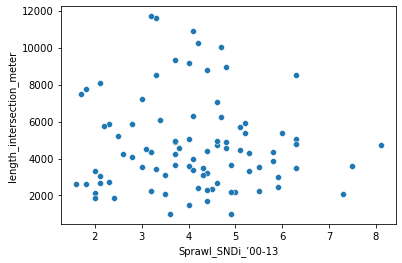

In [44]:
import seaborn as sns
sns.scatterplot(data=spraw_merge, 
                x="""Sprawl_SNDi_’00-13""", 
                y='length_intersection_meter')

<AxesSubplot:xlabel='Sprawl_SNDi_Stock', ylabel='length_intersection_meter'>

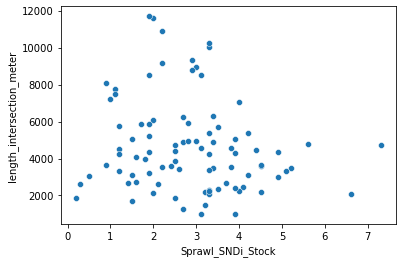

In [45]:
import seaborn as sns
sns.scatterplot(data=spraw_merge, 
                x="""Sprawl_SNDi_Stock""", 
                y='length_intersection_meter')

In [34]:
road_df.groupby('city_lower')['length_intersection_meter'].mean().sort_values(ascending=False).head(25)

city_lower
saintpetersburg    11695.529841
paris              11628.683254
moscow             10907.578599
toronto            10890.838069
sydney             10243.754998
minneapolis        10012.230456
boston              9982.716545
milan               9349.543984
warsaw              9195.720892
tyumen              8977.170551
chicago             8790.172930
montreal            8532.239631
newyork             8512.692879
detroit             8512.040168
stockholm           8461.372896
munich              8242.651250
berlin              8101.848434
denver              8089.794709
tokyo               7788.597632
kyiv                7627.092475
madrid              7507.553966
copenhagen          7479.950311
vienna              7203.150044
manchester          7062.212583
amsterdam           7002.665047
Name: length_intersection_meter, dtype: float64